In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'
df2 = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq='D'

## df1

<Axes: xlabel='Month'>

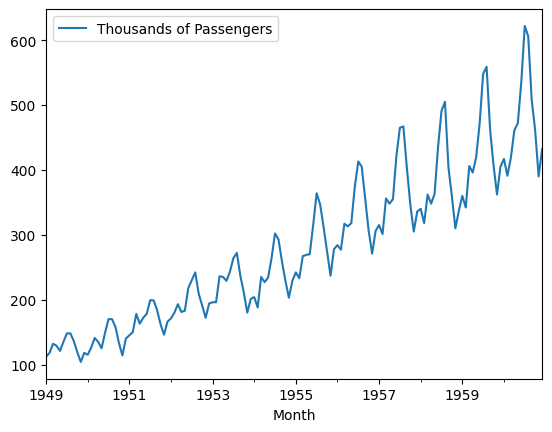

In [6]:
df1.plot()

In [10]:
df1.columns

Index(['Thousands of Passengers'], dtype='object')

## Adfuller

In [8]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060352,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.

    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.

    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.

        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.

    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
        values 0, 1, .

In [20]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# lags used', '# Observations'])

In [24]:
dfout

ADF Test Statistic      0.815369
p-value                 0.991880
# lags used            13.000000
# Observations        130.000000
dtype: float64

In [26]:
dftest

(0.8153688792060352,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [30]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [32]:
dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [48]:
if dfout.values[1] < 0.05:
    print("On rejette l'hypothèse nule donc la série est stationnaire")
else:
    print("On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire")

On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire


### La p-value > 0.05 donc on ne peut pas rejeter l'hypothèse nulle et elle est supérieure à toutes les valeurs critiques, donc la série est stationnaire.

## df2

<Axes: xlabel='Date'>

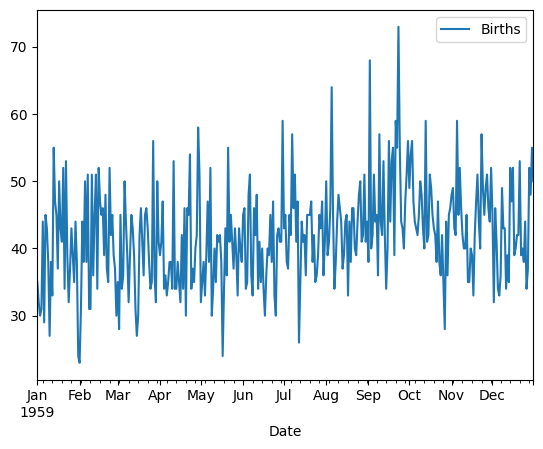

In [52]:
df2.plot()

In [54]:
df2.columns

Index(['Births'], dtype='object')

In [59]:
dftest = adfuller(df2['Births'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# lags used', '# Observations'])

for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

if dfout.values[1] < 0.05:
    print("On rejette l'hypothèse nule donc la série est stationnaire")
else:
    print("On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire")

On rejette l'hypothèse nule donc la série est stationnaire


In [61]:
dfout

ADF Test Statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# Observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64

### La p-value < 0.05 donc on peut rejeter l'hypothèse nulle, donc la série est stationnaire.

In [68]:
df3 = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\samples.csv', index_col=0, parse_dates=True)
df1.index.freq = 'MS'

<Axes: >

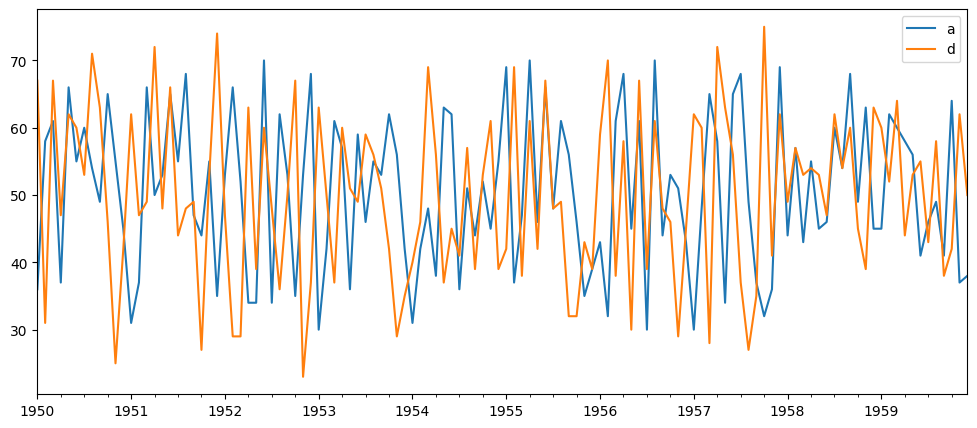

In [74]:
df3[['a', 'd']].plot(figsize=(12,5))

<Axes: >

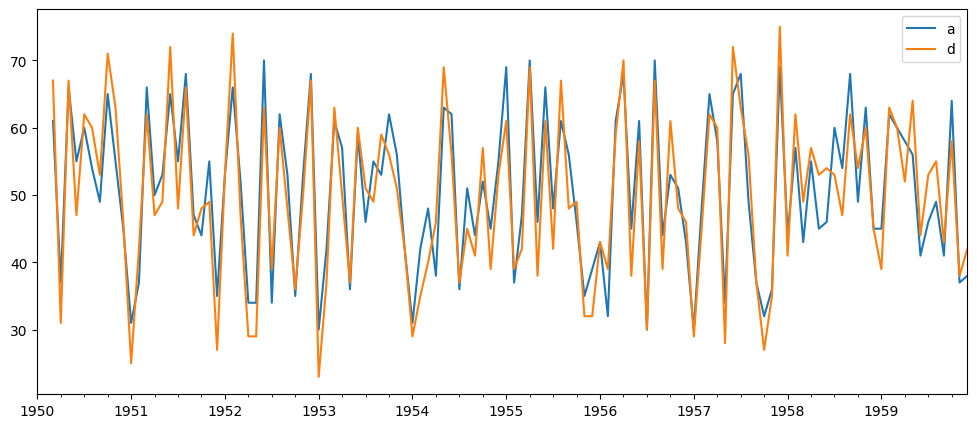

In [80]:
df3['a'].iloc[2:].plot(figsize=(12,5), legend=True)
df3['d'].shift(2).plot(legend=True)

## Test de causalité (à utiliser sur des séries stationnaires)

Le test de causalité de Granger est utilisé pour déterminer si une série temporelle (ici a) contient des informations utiles pour prévoir une autre série temporelle (d).

Basé sur un modèle de régression avec des valeurs retardées (lags)

In [84]:
from statsmodels.tsa.stattools import grangercausalitytests

In [90]:
grangercausalitytests(df3[['a','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


Les p-value < 0.05 montrent qu'il existe une causalité entre a et d

### Sans causalité

In [96]:
grangercausalitytests(df3[['b','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


Les p-value > 0.05 montrent qu'il n'existe pas de causalité entre b et d

# Vérifier quand se passe la saisonnalité

## Airline passengers

<Axes: xlabel='Month'>

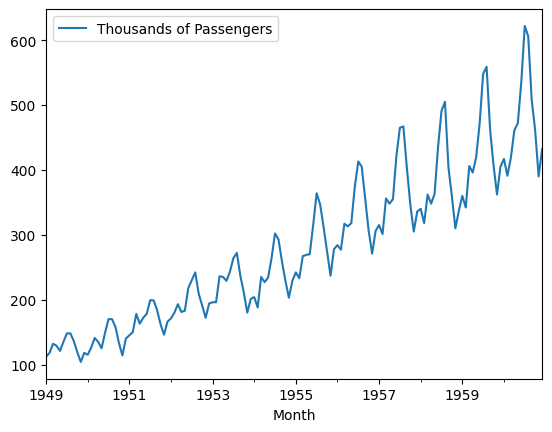

In [106]:
df1.plot()

In [110]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [112]:
df1.columns

Index(['Thousands of Passengers'], dtype='object')

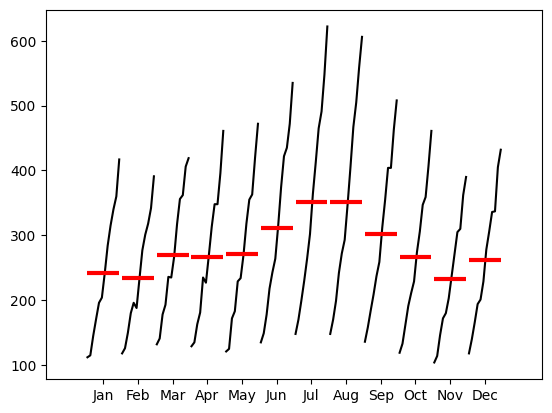

In [116]:
month_plot(df1['Thousands of Passengers']);

Augmentation des passagers durant les vacances d'été

In [124]:
df1q = df1['Thousands of Passengers'].resample(rule='Q').mean()

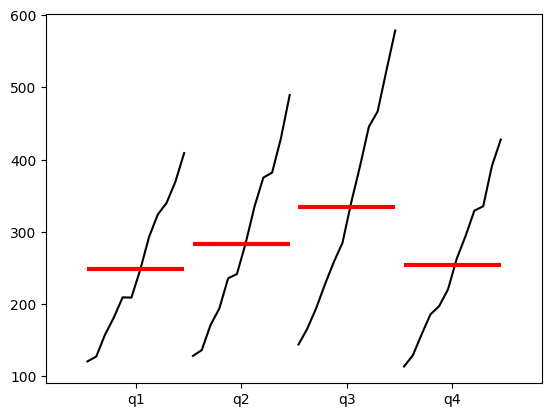

In [126]:
quarter_plot(df1q);

Augmentation des passagers pendant le 3ème trimestre